@author Gautam Kumar,
Email:gautam.kmr2893@outlook.com

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
Rawdata=pd.read_csv("house_data.csv")
Rawdata=Rawdata.dropna()
Rawdata.head()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Location,Price
0,1340,3,1.00,3,1955,Bangalore,221900.0
1,1690,3,2.25,3,1951,Bangalore,538000.0
2,2720,2,1.00,3,1933,Bangalore,180000.0
3,1360,4,3.00,5,1965,Bangalore,604000.0
4,1800,3,2.00,3,1987,Bangalore,510000.0


In [3]:
Rawdata['No_Of_Bathrooms']=Rawdata['No_Of_Bathrooms'].apply(np.ceil)
Rawdata.info()
Rawdata.astype(str)
Rawdata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Living_Space(sqft)        1199 non-null   int64  
 1   No_Of_Bedrooms            1199 non-null   int64  
 2   No_Of_Bathrooms           1199 non-null   float64
 3   Condition(on scale of 5)  1199 non-null   int64  
 4   Year_Build                1199 non-null   int64  
 5   Location                  1199 non-null   object 
 6   Price                     1199 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 65.7+ KB


,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Price
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1.199000e+03
mean,1980.279399,3.351960,2.358632,3.468724,1968.733945,5.237132e+05
std,682.079129,0.869379,0.908956,0.684052,28.063488,3.608204e+05
min,760.000000,0.000000,0.000000,1.000000,1900.000000,7.500000e+04
25%,1480.000000,3.000000,2.000000,3.000000,1952.000000,3.093000e+05
50%,1840.000000,3.000000,2.000000,3.000000,1972.000000,4.350000e+05
75%,2350.000000,4.000000,3.000000,4.000000,1992.000000,6.300000e+05
max,5790.000000,7.000000,6.000000,5.000000,2015.000000,5.110000e+06


In [4]:
#Perform  hot encoder
dummies=pd.get_dummies(Rawdata.Location)
merge=pd.concat([Rawdata,dummies], axis='columns')
merge.head()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Location,Price,Bangalore,Chennai,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340,3,1.0,3,1955,Bangalore,221900.0,1,0,0,0,0,0,0
1,1690,3,3.0,3,1951,Bangalore,538000.0,1,0,0,0,0,0,0
2,2720,2,1.0,3,1933,Bangalore,180000.0,1,0,0,0,0,0,0
3,1360,4,3.0,5,1965,Bangalore,604000.0,1,0,0,0,0,0,0
4,1800,3,2.0,3,1987,Bangalore,510000.0,1,0,0,0,0,0,0


In [5]:
final_merge=merge.drop(['Location','Chennai'],axis='columns')
final_merge.head()

,Living_Space(sqft),No_Of_Bedrooms,No_Of_Bathrooms,Condition(on scale of 5),Year_Build,Price,Bangalore,Kolkata,Mumbai,New Delhi,Patna,lucknow
0,1340,3,1.0,3,1955,221900.0,1,0,0,0,0,0
1,1690,3,3.0,3,1951,538000.0,1,0,0,0,0,0
2,2720,2,1.0,3,1933,180000.0,1,0,0,0,0,0
3,1360,4,3.0,5,1965,604000.0,1,0,0,0,0,0
4,1800,3,2.0,3,1987,510000.0,1,0,0,0,0,0


In [6]:
corr=Rawdata.corr()

<AxesSubplot:>

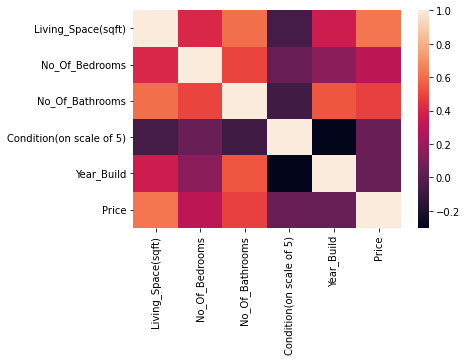

In [7]:
sns.heatmap(corr)

In [8]:
y=final_merge.Price
x=final_merge.drop("Price",axis=1)

In [9]:
#dividing the data based on testing and training dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=2/3,random_state=0)

In [10]:
#Importing the linear regression model
from sklearn.linear_model import LinearRegression
createmodel=LinearRegression()
createmodel.fit(x_train,y_train)

LinearRegression()

In [11]:
y_predict=createmodel.predict(x_test)
y_predict

array([ 584635.19963415,  156912.27445641,  781556.86671361,
        343428.56893466,  558851.84357256,  183050.04403688,
        550470.4132906 ,  318884.42040423,  443597.7623457 ,
       1079435.71192258,  592393.82601368,  747507.75130968,
        559526.50891263,  468772.56944797,  414771.81606949,
        414759.82165855,  169240.12935351,  237036.5590607 ,
        406349.36909503,  524077.16046556,  305340.89279474,
        484983.92896215,  298839.53958035,  874881.38624122,
        753024.96539059,  672453.66139401,  226966.49353041,
        349877.54335217,  502543.65008535,  389397.22010363,
       1556792.26276495,  351327.29303824,  151926.58304612,
        379412.41954512,  819233.10032466,  103401.18066129,
        503492.34755289,  412346.36692169,  225526.94020327,
        274873.24627545,  898284.24623112,  571761.20858489,
        655183.09987546,  725190.33131204,  976153.79617178,
        446900.37586419,  757757.03479357,  573164.67712992,
        540985.62683692,

In [12]:
#calculating accuracy of a model
accuracy=createmodel.score(x,y)
accuracy

0.48099657061311707

In [13]:
#calculating the error in the model
error_in_model=1-accuracy
error_in_model

0.5190034293868829

In [14]:
# compute with statsmodels, by adding intercept manually
X1 = sm.add_constant(x)
result = sm.OLS(y, X1).fit()
print (result.rsquared, result.rsquared_adj)

0.4839279409313286 0.4791454702912652


# Conclusion:As we all know that rsquared and rsquared_adj values should be near to one it means the performance of model is perfect but in case of this model the score and performance all is below 50%  so this model can't be deployed into production.


# Challenge:You guys have to improve the accuracy as well the performance??